In [1]:
import numpy as np
from numpy import linspace, array, zeros, insert, delete
from pandas import DataFrame, pivot_table

#mendefinisikan nilai fungsi dari contoh
def f(x):
    return(2*x)
        
D=1 #koefisien difusivitas
xm=10 #panjang penampang
A=0 #konsentrasi di x_0
B=64 #konsentrasi di x_m
deltat=0.2 #selisih waktu
tn=100 #batas waktu pada t_n
m=5 #banyak pemotongan pada penampang
deltax=xm/m #selisih antar posisi
lamda=(D*deltat)/(deltax)**2 #lamda

#melakukan uji kestabilan metode
if lamda<=0.5:
    print('Metode stabil, sebab lambda =', lamda, '<= 0.5')
else:
    print('Metode tidak stabil, cek kembali masukan')

#mendefinisikan matriks nol U berukuran (tn+1)x(m+1)
U=zeros((tn+1,m+1))

#mengisi syarat awal ke baris pertama matriks U
for i in range (m+1):
    
    U[0][i]=f(i*deltax)

#mengisi syarat batas
#ke kolom pertama dan kolom ke-(m+1) matriks U
for k in range (tn):
    for i in range (m-1):
        
        ii=i+2
        U[k+1][0]=A
    
    U[k+1][ii]=B

#mengisi entri matriks U yang belum terisi
#berdasarkan rumus metode eksplisit
for k in range (tn):
    for i in range (m-1):
                
        ii=i+1
        U[k+1][ii]=lamda*U[k][ii-1]+(1-2*lamda)*U[k][ii]+lamda*U[k][ii+1]

U=delete(U,0,0)
        
#membuat keluaran berupa tabel nilai pendekatan
print('Tabel nilai pendekatan suhu di x = 0 sampai x =',m)
DataFrame(U)

Metode stabil, sebab lambda = 0.05 <= 0.5
Tabel nilai pendekatan suhu di x = 0 sampai x = 5


,0,1,2,3,4,5
0,0.0,4.000000,8.000000,12.000000,16.000000,64.0
1,0.0,4.000000,8.000000,12.000000,18.200000,64.0
2,0.0,4.000000,8.000000,12.110000,20.180000,64.0
3,0.0,4.000000,8.005500,12.308000,21.967500,64.0
4,0.0,4.000275,8.020350,12.575850,23.586150,64.0
...,...,...,...,...,...,...
95,0.0,10.263929,21.483771,34.267946,48.638324,64.0
96,0.0,10.311725,21.561987,34.347256,48.687889,64.0
97,0.0,10.358652,21.638738,34.425024,48.736463,64.0
98,0.0,10.404723,21.714048,34.501282,48.784068,64.0


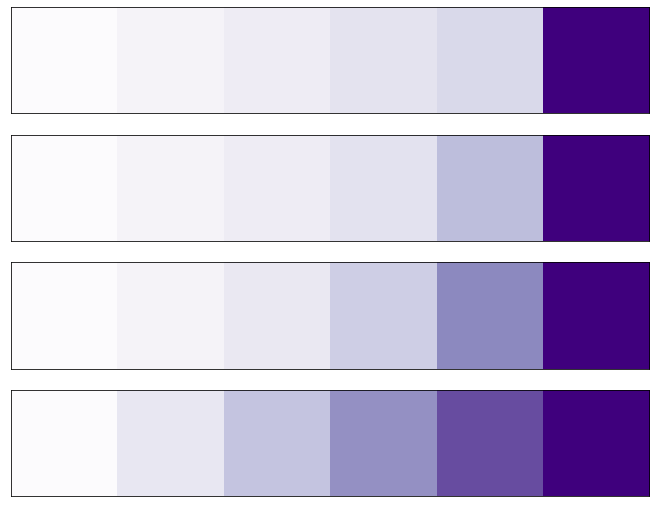

In [2]:
#PROGRAM UNTUK MENGELUARKAN HEATMAP HASIL
#METODE BEDA HINGGA EKSPLISIT DIMENSI SATU
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,9))

ax1 = plt.subplot(411)
ax1.set_xticks([]), ax1.set_yticks([])
ax1.imshow([U[0]], cmap='Purples')

ax2 = plt.subplot(412)
ax2.set_xticks([]), ax2.set_yticks([])
ax2.imshow([U[4]], cmap='Purples')

ax3 = plt.subplot(413)
ax3.set_xticks([]), ax3.set_yticks([])
ax3.imshow([U[19]], cmap='Purples')

ax4 = plt.subplot(414)
ax4.set_xticks([]), ax4.set_yticks([])
ax4.imshow([U[99]], cmap='Purples')

In [4]:
#mengambil package yang diperlukan untuk membuat animasi
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

Animasi Proses Difusi pada Zat Penampang pada Dimensi Satu


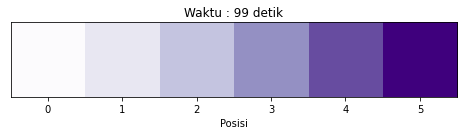

In [12]:
#mengatur posisi kanvas untuk membuat gambar per frame
fig = plt.figure(figsize=(8,2))
ax = plt.subplot()
print('Animasi Proses Difusi pada Zat Penampang pada Dimensi Satu')
ax.set_xlabel('Posisi')

#mengatur posisi awal matriks yang akan digambar pada kanvas
nx = 1
ny = m-1

line2d, = ax.plot([], [], lw=2)

#mendefinisikan animasi (dalam m+1 frame)
#def init():
#    line2d.set_data([], [])
#    ax.imshow(np.zeros((nx, ny)))
#    ax.set_xticks([]), ax.set_yticks([])
#    return (line2d,)

def animate(i):
    ax.set_title('Waktu : '+str(i)+' detik')    
    ax.imshow([U[i]], cmap='Purples')
    ax.set_yticks([])
    return (line2d,)

#membuat keluaran berupa animasi
anim = animation.FuncAnimation(fig, animate, frames=tn, interval=100, blit=True)
HTML(anim.to_html5_video())